# Simple and Multiple Linear Regression with Python

The aim of this fist course is to make an introduction of the linear regression model from a **Statistical** point of view. 
We are going to see, in the next courses, how we are going to study this model from a **Machine Learning** point of view, *i.e.*, given a different context.

In the previous class, we have seen we can study the link between two random variables where at least one was a *qualtative* one. 
We have built some test in order to determine if the link between these two variables was significant or not. 

We are going a little bit further now and study the link between two (or more) quantitatives random variables. More precisely, we are going to study the relation between a random variable *Y*, which will be called the **dependent** random variable and $X_1, X_2, \ldots, X_p$ a set of **independent** random variables.
We aim to study if ce are able to predict the values taken by the random variable $Y$ using the set of variables $X_1, X_2, \ldots, X_p$.

For instance, this is done to predict the sales revenue in a given store ($Y$) using several information, the temperature of the day ($X_1$), the number of customers ($X_2$) you are going to have in the store (this number can be predicted by another type of model) if you are in the weekend or not ($X_3$), etc. 




## 1. Presentation of the model

In order to do the prediction, we are going to assume that we have linear relationship between $Y$ and $X_1, X_2, \ldots, X_p$, *i.e.*, 

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \varepsilon$$,

where 

- $Y$ is the dependent variable,
- $X_j, \; j=1, \ldots, p $ are the dependent variable,
- $\beta_j, \; j=1,\ldots, p$ are the parameters of the model,
- $\varepsilon$ are random noise which represent the noise in the data/model (it means that the model we are learning is not a perfect one).

Most of the time, we assume that we are working in the *Gaussian* setting, thus, we are formulating assumptions on the erros of the model:

- the data $S= \lbrace (y_i,\bf{x}_i)\rbrace_{i=1}^m$ are independent,
- the noise follow a normal distribution and are independent, *i.e.*, $\varepsilon \underset{i.i.d.}{\sim} \mathcal{N}(0,\sigma^2)$, where the variance of the model is the same for every observations.

The above problem is usually written as follows, using matrices

$$ Y = X\beta + \varepsilon$,

where

- $X \in \mathbb{R}^{m\times (p+1)}$ is the *design* matrix,
- $y$ is the vector of observations $y_1, \ldots, y_p$,
- $\beta = (\beta_1, \ldots, \beta_p) \in \mathbb{R}^{p+1} $ is the parameter vector.
- $\varepsilon = (\varepsilon_1, \ldots, \varepsilon_p)\mathbb{R}^{m} $ is the vector of random errors in the data.

### Example 1

We consider a little dataset where we aim to predict the values taken by a randim variable $Y$ given another variable $X$.
We are going to work with the following dataset.

In [1]:
# First, we import the required package to perform a linear regression

import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# We download the dataset we are going to work.

df = sm.datasets.get_rdataset('Duncan', 'carData').data
y = df['income']
x = df['education']

# To show the first lines of the dataset.

df.head()

type  income  education  prestige
rownames                                     
accountant  prof      62         86        82
pilot       prof      72         76        83
architect   prof      75         92        90
author      prof      55         90        76
chemist     prof      64         86        90

In this example, we want to predict the **income** given the **education** of the observation.
Later, we are going to consider the other variable prestige, in order to work with a multiple linear regression.

Text(0, 0.5, 'Income')

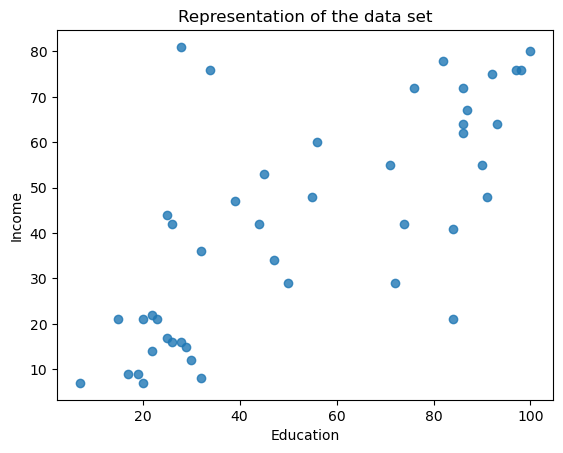

In [3]:
# Representation of the data

plt.scatter(x,y, alpha = 0.8)
plt.title("Representation of the data set")
plt.xlabel("Education")
plt.ylabel("Income")


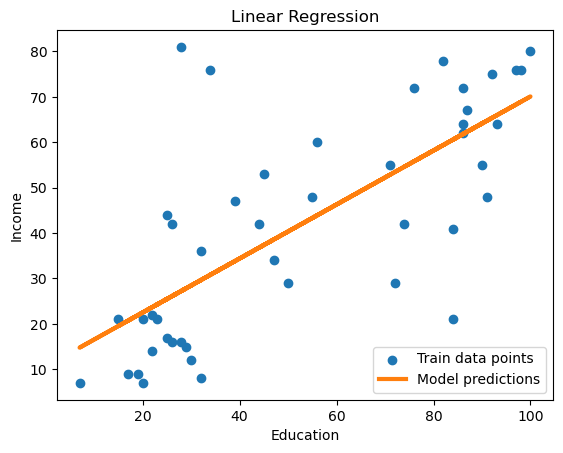

In [4]:
# Learn the model

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

# Extract the model parameters
b, m = results.params

# Represent the learning model
plt.scatter(x, y, label="Train data points")
plt.plot(
    x,
    results.predict(),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
plt.title("Linear Regression")
plt.xlabel("Education")
plt.ylabel("Income")
plt.legend()

It seems that we have a linear relationship between these two variables. The following line of code provides several outputs on the learned model that we are going to explain in this course.

In [5]:
# Summary of the model

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           1.84e-08
Time:                        22:00:30   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6035      5.198      2.040      0.048       0.120      21.087
education      0.5949      0.086      6.893      0.000       0.421       0.769
==============================================================================
Omnibus:                        9.841   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.609
Skew:                           0.776   Prob(JB):                      0.00497
Kurtosis:                       4.802   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Parameter estimation

We have previously seen that the a line was learned to describe the relation between the two variables. But ... how is it learned? 

Keep in mind that the main idea is to find a *line* which is good approximation of the dataset, *i.e.* which is not far from the set of points. But, what does that mean not being far from a set of point, which distance are we going to use for this and how the parameters $\beta_j$ estimated. 

All of this is given in the proposition below

**Proposition:** We consider the following probabilistic model for our data.

$$Y =  X\beta + \varepsilon,$$

where $Y$ it the predicted variable and $X$ is the set of variables that are used for the prediction and $\varepsilon$ represents the error of the model.\\
We consider a hypothesis $h$ of the form:

$$h(\beta,X) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_p x_p. $$

Given a set $S$ of $m$ examples, $X = (x_1,x_2,\ldots,x_m)$ and $y = (y_1,y_2,\ldots, y_m)$
then the solution of Ordinary Least Square problem:

$$\underset{\beta \in \mathbb{R}^{p+1}}{\min} \; \Vert y-h(\beta, X) \Vert_2^2 = \underset{\beta \in \mathbb{R}^{p+1}}{\min} \; \sum_{i=1}^m \left(y_i - h(\beta,x_i)\right)^2 = \underset{\beta \in \mathbb{R}^{p+1}}{\min} \; \sum_{i=1}^m \left(y_i - (\beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \ldots + \beta_p x_{i,p})\right)^2 ,$$

is given by: 

$$\hat{\beta} = (X^\top X)^{-1}X^\top y.$$

### Exercise 1: Expression of the solution for the simple linear model

Use your knowledge to give an expression of the slope and the intercept of the simple linear model using matrix calculations and the result presented above. 
More precisely, show that the slope $\beta_1$ and the intercept $\beta_0$ are respectively given by :

$$ \hat\beta_1 = \dfrac{Cov[X,Y]}{Var[X]} \quad \text{and} \quad \hat\beta_0 = \mathbb{E}[Y] - \hat\beta_1\mathbb{E}[X],$$

where $\mathbb{E}[•]$ stands for the expectation of the random variable, $i.e.$, its mean value, $Var[•]$ for its variance and $Cov[•,•]$ stands for the covriance of a couple of random variables.

## 3. Output of the linear model

In [6]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           1.84e-08
Time:                        22:00:30   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6035      5.198      2.040      0.048       0.120      21.087
education      0.5949      0.086      6.893      0.000       0.421       0.769
==============================================================================
Omnibus:                        9.841   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.609
Skew:                           0.776   Prob(JB):                      0.00497
Kurtosis:                       4.802   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We are going to explain all of these outputs: what they mean, how they can be used and ... how they can be computed. 

### Exercise 2: Linear model output

Use what has been presented in class in order to compute the outputs of the linear regression models. 
Focus only on the one that have been presented in class, you can focus on:

- parameters estimation: values, standard errors, t-values and p-values.
- quality of the model: F-statistic, R-squared and Adj. R-squared.

### Exercise 3: Multiple linear model

Now we aim to repeat the same exercise as in Exercise 2 but using the two variables *education* and *prestige* in order to predcit the *income*, *i.e.*, working with a multiple linear model. 

Compare this multiple linear model, with the simple linear model. Can you say that this model is better? Are the variables important for the prediction? Write your observations and conclusion. 

You can use the above code to conduct your analysis and the small script below in order to prepare your dataset. 

In [1]:
df = sm.datasets.get_rdataset('Duncan', 'carData').data
y = df['income']
x = df[['education','prestige']]

NameError: name 'sm' is not defined